# Association Rules Exercise: Auto Sales

The exercises in this notebook are similar to what you have seen in the labs/practices. 

This notebook uses auto sales data for the resale of cars. Let's try to find if there are patterns of features that occur frequently.


The two fields of data **`dateCreated`** and **`lastSeen`** could be indicators of when a car came into the store and when it left the store (or was sold). If we take the difference in days then we can try to predict the number of days it took for the car to be resold. 

Read the data from `/dsa/data/all_datasets/autos.csv`

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
%matplotlib inline

**Activity 1:** Read the auto_sales data into a variable called auto_sales

In [3]:
# Your code for activity 1 goes here.
# reading the auto sales data into a variable called auto_sales
auto_sales = pd.read_csv('/dsa/data/all_datasets/autos.csv')

#displaying the first few rows to ensure the data is loaded correctly
auto_sales.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Activity 2:** Trim both the leading and trailing white spaces from the name column in auto_sales

In [4]:
# Your code for activity 2 goes here.
# remove spaces from the name column in the dataset
auto_sales['name'] = auto_sales['name'].str.strip()

#show the head rows data, confirm spaces have been removed
auto_sales['name'].head()

0                        Golf_3_1.6
1              A5_Sportback_2.7_Tdi
2    Jeep_Grand_Cherokee_"Overland"
3                GOLF_4_1_4__3T�RER
4    Skoda_Fabia_1.4_TDI_PD_Classic
Name: name, dtype: object

**Activity 3:** Replace the underscores between the words in the name column with white spaces

In [5]:
# Your code for activity 3 goes here.
# replace underscores to space in name column
auto_sales['name'] = auto_sales['name'].str.replace('_',' ')

#show head rows data to confirm the underscores had been replaced
auto_sales['name'].head()


0                        Golf 3 1.6
1              A5 Sportback 2.7 Tdi
2    Jeep Grand Cherokee "Overland"
3                GOLF 4 1 4  3T�RER
4    Skoda Fabia 1.4 TDI PD Classic
Name: name, dtype: object

**Activity 4:**
Generate the days column by subtracting the **dateCreated** from the **lastSeen** column. 

**HINT:** You can directly subtract the dates if they are in proper date format. 

In [7]:
# Your code for activity 4 goes here.
# confirm datacreated and lastseen are date format
auto_sales['dateCreated'] = pd.to_datetime(auto_sales['dateCreated'])
auto_sales['lastSeen'] = pd.to_datetime(auto_sales['lastSeen'])

# calculate the difference in days between lastSeen and dataCreated, and save in 'days'
auto_sales['days'] = (auto_sales['lastSeen'] - auto_sales['dateCreated']).dt.days

# show the head rows to confirm the column had been created
auto_sales[['dateCreated','lastSeen','days']].head()


,dateCreated,lastSeen,days
0,2016-03-24,2016-04-07 03:16:57,14
1,2016-03-24,2016-04-07 01:46:50,14
2,2016-03-14,2016-04-05 12:47:46,22
3,2016-03-17,2016-03-17 17:40:17,0
4,2016-03-31,2016-04-06 10:17:21,6


**Activity 5:** Remove the columns dateCrawled, dateCreated and lastSeen from the dataframe

In [8]:
# Your code for activity 5 goes here.
# delete datecrawled, datecreated, lastseen
auto_sales = auto_sales.drop(['dateCrawled','dateCreated','lastSeen'],axis=1)

#show the head rows to confirm these had been deleted
auto_sales.head()


,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode,days
0,Golf 3 1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,0,70435,14
1,A5 Sportback 2.7 Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,0,66954,14
2,"Jeep Grand Cherokee ""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,0,90480,22
3,GOLF 4 1 4 3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,0,91074,0
4,Skoda Fabia 1.4 TDI PD Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,0,60437,6



**Activity 6:** Convert all columns to Dtype object. Verify the data type of all columns. Make sure all columns are of factor type before we create transactions from auto-sales dataframe. 

In [10]:
# Your code for activity 5 goes here.
# convert all column to dtype object
auto_sales = auto_sales.astype('object')

#show all types of column to confirm it covernt to object tpye
auto_sales.dtypes


name                   object
seller                 object
offerType              object
price                  object
abtest                 object
vehicleType            object
yearOfRegistration     object
gearbox                object
powerPS                object
model                  object
kilometer              object
monthOfRegistration    object
fuelType               object
brand                  object
notRepairedDamage      object
nrOfPictures           object
postalCode             object
days                   object
dtype: object

**Activity 7:** auto_sales is a large dataset, so use first 5000 rows. The server cannot be able to generate transactions for such large data.

Now, coerce the data set into transactions. Save the transactions to the variable auto_trans. 

In [11]:
auto_sales = auto_sales[:5000]

In [13]:
%%time
# Your code for activity 6 goes here.
# select the top 5000 rows
auto_sales = auto_sales[:5000]

#convert the dataset into transaction
auto_trans = auto_sales.applymap(lambda x: str(x))

#show the top rows to confirm it convernt to transactions
auto_trans.head()


CPU times: user 74.4 ms, sys: 864 µs, total: 75.3 ms
Wall time: 75.5 ms


,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode,days
0,Golf 3 1.6,privat,Angebot,480,test,nan,1993,manuell,0,golf,150000,0,benzin,volkswagen,nan,0,70435,14
1,A5 Sportback 2.7 Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,nan,125000,5,diesel,audi,ja,0,66954,14
2,"Jeep Grand Cherokee ""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nan,0,90480,22
3,GOLF 4 1 4 3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,0,91074,0
4,Skoda Fabia 1.4 TDI PD Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,0,60437,6


**Activity 8:** Generate association rules for the transactions in auto_trans with support of 0.3 and confidence of 0.6. How many rules are there?

In [21]:
%%time 
# Your code for activity 7 goes here.

auto_trans_sample = auto_trans.sample(n=1000, random_state=1)

auto_trans_encoded = auto_trans_sample.stack().str.get_dummies().groupby(level=0).max()

frequent_itemsets = apriori(auto_trans_encoded, min_support=0.3, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

len(rules)


CPU times: user 1min 16s, sys: 1.65 s, total: 1min 17s
Wall time: 1min 17s


1089

**Activity 9:** Draw a scatter plot for the generated rules using 'support' and 'confidence'. Use 'leverage' for shading. 

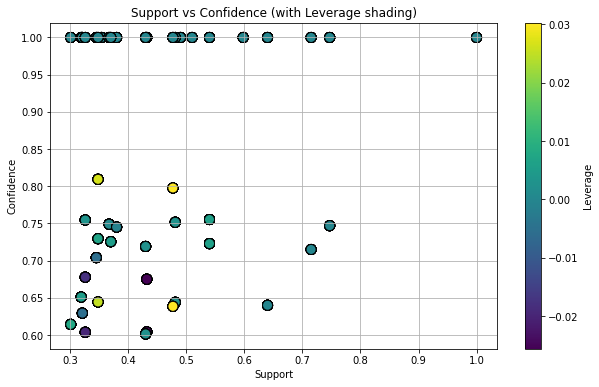

In [22]:
# Your code for activity 10 goes here.

import matplotlib.pyplot as plt

# Plotting a scatterplot, using support and confidence as axes, and coloring with leverage
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['leverage'], cmap='viridis', s=100, edgecolor='k')
plt.colorbar(label='Leverage')
plt.title('Support vs Confidence (with Leverage shading)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


**Activity 10:** Draw a scatter plot with lift and leverage scores. Shade using conviction. Identify 5 rules with relatively high lift, leverage, and conviction. (There is no one correct answer)

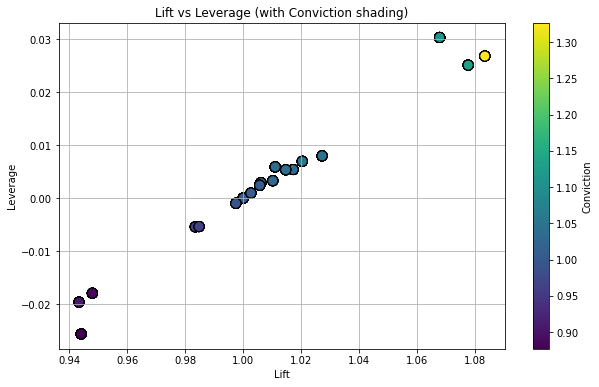

In [30]:
# Use lift and leverage as axes and sureness as a color
plt.figure(figsize=(10, 6))
plt.scatter(rules['lift'], rules['leverage'], c=rules['conviction'], cmap='viridis', s=100, edgecolor='k')
plt.colorbar(label='Conviction')
plt.title('Lift vs Leverage (with Conviction shading)')
plt.xlabel('Lift')
plt.ylabel('Leverage')
plt.grid(True)
plt.show()




In [25]:
# Identify the 5 rules with high lift, leverage and conviction
top_rules = rules.nlargest(5, ['lift', 'leverage', 'conviction'])
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
254,"(benzin, nein)",(manuell),0.43,0.747,0.348,0.809302,1.083403,0.02679,1.326707
507,"(benzin, nein, 0)",(manuell),0.43,0.747,0.348,0.809302,1.083403,0.02679,1.326707
511,"(benzin, nein)","(0, manuell)",0.43,0.747,0.348,0.809302,1.083403,0.02679,1.326707
635,"(benzin, Angebot, nein)",(manuell),0.43,0.747,0.348,0.809302,1.083403,0.02679,1.326707
639,"(benzin, nein)","(Angebot, manuell)",0.43,0.747,0.348,0.809302,1.083403,0.02679,1.326707


**Activity 11:** Write the generated rules to a csv file called "auto_sales.csv"

In [31]:
# Your code for activity 10 goes here.
# ------------------------------------
rules.to_csv("auto_sales.csv")


# Save your notebook, then `File > Close and Halt`